<a href="https://colab.research.google.com/github/alexmireltv/03MIAR---Algoritmos-de-Optimizacion---2023/blob/main/Algoritmos_Alexandru_Mirel_Taranu_Vacaru_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

Solucion: [-1.8177230394120856e-23, -1.3348110359372213e-23] 5.0858375496693084e-46


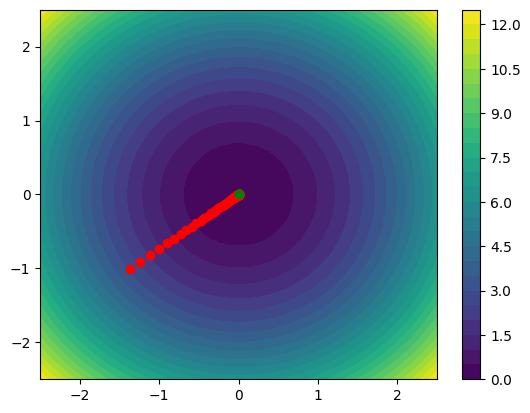

In [ ]:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="red")
TA = 0.05

for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solucion:", P, f(P))